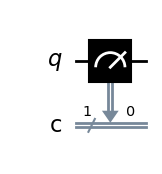

In [14]:
from qiskit import QuantumCircuit, Aer
from qiskit.circuit import Gate

qc0 = QuantumCircuit(1, 1)
qc0.measure(0, 0)

qc0.draw('mpl')

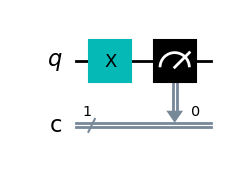

In [4]:
qc1 = QuantumCircuit(1, 1)
qc1.x(0)
qc1.measure(0, 0)

qc1.draw('mpl')

In [15]:
from qiskit import pulse
from qiskit.providers.fake_provider import FakeValencia

backend = FakeValencia()
backend_defaults = backend.defaults()

simulator = Aer.get_backend('aer_simulator')

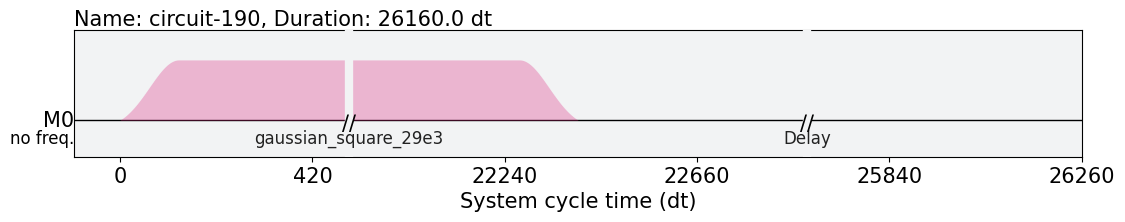

In [6]:
from qiskit import transpile, schedule as build_schedule

transpiled_qc0 = transpile(qc0, backend)
schedule0 = build_schedule(transpiled_qc0, backend)
schedule0.draw()

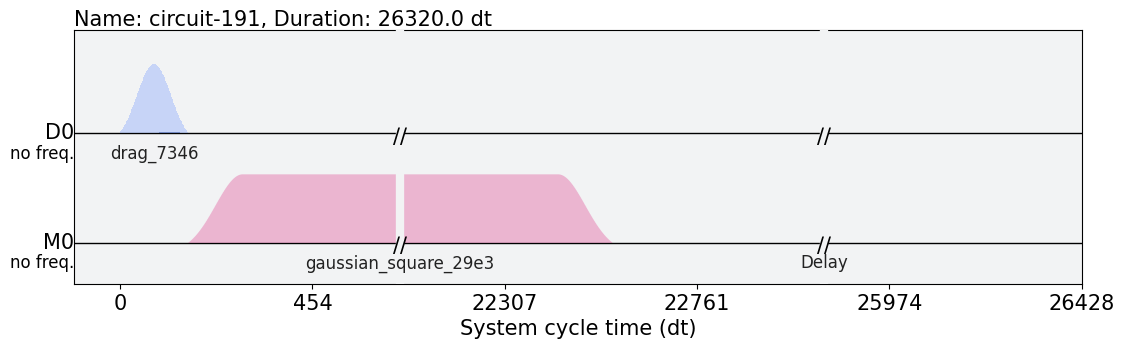

In [7]:
transpiled_qc1 = transpile(qc1, backend)
schedule1 = build_schedule(transpiled_qc1, backend)
schedule1.draw()

In [8]:
import numpy as np
# unit conversion factors -> all backend properties returned in SI 
# (Hz, sec, etc)
GHz = 1.0e9 # Gigahertz
MHz = 1.0e6 # Megahertz
kHz = 1.0e3
us = 1.0e-6 # Microseconds
ns = 1.0e-9 # Nanoseconds

In [9]:
frequency_span_Hz = 320 * kHz
frequency_step_Hz = 8 * kHz
center_frequency_Hz = backend_defaults.meas_freq_est[0]
print(f"Qubit {0} has an estimated readout frequency of {center_frequency_Hz / GHz} GHz.")
frequency_min = center_frequency_Hz - frequency_span_Hz / 2
frequency_max = center_frequency_Hz + frequency_span_Hz / 2
frequencies_GHz = np.arange(frequency_min / GHz, 
                            frequency_max / GHz, 
                            frequency_step_Hz / GHz)
print(f"The sweep will go from {frequency_min / GHz} GHz to {frequency_max / GHz} GHz\
      in steps of {frequency_step_Hz / MHz} MHz.")

Qubit 0 has an estimated readout frequency of 7.291423281 GHz.
The sweep will go from 7.291263281 GHz to 7.291583281 GHz      in steps of 0.008 MHz.


In [53]:
num_shots_per_frequency = 2048
frequencies_Hz = frequencies_GHz*GHz
schedule_los = [{meas_chan: freq} for freq in frequencies_Hz]

job0 = backend.run(transpiled_qc0,
                   meas_level=0,
                   meas_return='avg',
                   schedule_los=schedule_los,
                   shots=num_shots_per_frequency,
                   memory=True
                  )

job1 = backend.run(transpiled_qc1,
                   meas_level=0,
                   meas_return='avg',
                   schedule_los=schedule_los,
                   shots=num_shots_per_frequency,
                   memory=True
                  )

In [104]:
scale_factor = 1e-14
sweep_values_0 = []
for i in range(len(qc0_results.results)):
    res_0 = qc0_results.get_memory(i)*scale_factor
    sweep_values_0.append(res_0[0])
sweep_values_1 = []
for i in range(len(qc1_results.results)):
    res_1 = qc1_results.get_memory(i)*scale_factor
    sweep_values_1.append(res_1[0])
    
plotx = frequencies_Hz/kHz
ploty_0 = np.abs(sweep_values_0)
ploty_1 = np.abs(sweep_values_1)

TypeError: can't multiply sequence by non-int of type 'float'

In [37]:
from qiskit_experiments.library import ResonatorSpectroscopy

qubit = 1
spec = ResonatorSpectroscopy([qubit], backend)
exp_data = spec.run().block_for_results()
#exp_data.add_figures(0)
exp_data.figure(0)

Adding a job from a backend (aer_simulator) that is different than the current backend (fake_valencia). The new backend will be used, but service is not changed if one already exists.
Analysis callback failed [Experiment ID: 633a3069-5b5f-40a5-ad3f-9b77aee9ec66][Analysis Callback ID: 934b58dbb700456dbb7d903400bb9e45]:
Traceback (most recent call last):
  File "C:\Users\leona\OneDrive - University of Pisa\Tesi\qiskit_backup\lib\site-packages\qiskit_experiments\data_processing\data_processor.py", line 231, in _data_extraction
    outcome = datum[self._input_key]
KeyError: 'memory'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\leona\OneDrive - University of Pisa\Tesi\qiskit_backup\lib\site-packages\qiskit_experiments\framework\experiment_data.py", line 897, in _run_analysis_callback
    callback(self, **kwargs)
  File "C:\Users\leona\OneDrive - University of Pisa\Tesi\qiskit_backup\lib\site-packages\qiskit_experi

ExperimentEntryNotFound: 'Figure 0 not found.'